# Głębokie Sieci neuronowe - projekt 

## Sprawozdanie 

Wykonał - Stanisław Felczyński 247366 \
Prowadzący - dr hab. inż. Andrzej Rusiecki

Głębokie sieci neuronowe w grze kółko i krzyżyk na planszy 6x6. 

Celem projektu było wytrenowanie dwóch róznych głębokich sieci neuronowych do gry w kółko i krzyżyk na planszy 6x6. 

Wytrenowane zostały jedna stosunkowo prosta autorska sieć konwolucyjna, oraz słynna sieć Alpha Zero. 

Poniżej opisy wybranych graczy:

## Sieć konwolucyjna 

Niewielka sieć konwolucyjna uczy się na podstawie zbioru danych zawierającego historie (wszystkie ruchy po kolei) gier wraz z informacją kto był zwycięzcą nanej gry. Sieć prubuje przewidywać na podstawie stanu gry kto będzie zwycięzcą. Jest to podejście do uczenia proste w implementacji, ale przynoszące mierne skutki. Sieć taka nigdy nie nauczy się grać lepiej niż poziom gier w zbiorze treningowym, oraz może zacząć grać zupełnie przypadkowo w sytuacjach które nie występowały w zbiorze treningowym. 

Uczenie takiej sieci na grach przypadkowych może mieć wręcz negatywny wpływ na jego efektywność, gdyż oceną poszczególnych ruchów jest jedynie ostateczne zwycięstwo w grze. W grach losowych spodziewamy się że korelacja pomiędzy dobrymi ruchami za wgranymi będzie niewielka, więc sieć będzie się uczyła praktycznie losowego szumu. 

## Alpha Zero

Ta przygotowana przez Open AI sieć uczy się zupełnie inaczej, poprzez granie gier z samą sobą zupełnie od zera, bez żadnych danych treningowych. Sieć ta jest dosyć ogroma, a jej trenowanie zabiera mnóstwo czasu, jednak potencjalnie może ona nauczyć się każdej gry oraz osiągnąć bardzo wysoki poziom bez potrzeby uczenia się gotowych strategii.  

Sieć uczyła się ok. 3 dni bez przerwy, przez ten czas wykonało się 5 epok. 

## Random 

Wykonuje przypadkowy ruch.

## Score i ScoreV2 

Wykonują ruch który zwiększa ile w rzędzie mają symboli swoich. 

In [1]:
from board import (play_games, play_games_more_stats, play_random_move, play_middle_move, play_score_move, play_scoreV2_move, play_showcase, play_test_game, play_human_game, Board)
from DCNN import create_dcnn_player 
from Alpha_Z import create_Alpha_Z_player
from Alpha_Z_rev import create_Alpha_Z_rev_player
import numpy as np
import time
import matplotlib.pyplot as plt
import keras

In [2]:
model = keras.models.load_model('model_conv_scorev2')
play_dcnn_move = create_dcnn_player(model)
print(model.summary())

Powyższy model został wytrenowany na zbiorze 100.000 gier granych przez gracza ScoreV2 (maksymalizuje swój wynik). Ten gracz jest bardzo zachowawczy, i większość gier wygląda bardzo podobnie (co widać na heatmapach poniżej). Spodziewamy sie więc, że sieć nauczy się dobrze odtwarzać styl gry (Scove vs Score), natomiast może już nie radzić sobie najlepiej w grach z graczem losowym, których brak w zbiorze treningowym. 


-----------

X wins: 67.20%
O wins: 32.80%
draws:  0.00%
Average moves played in game:  9.56
Average time of game:  16.41 ms
Average time of move:  1.717 ms


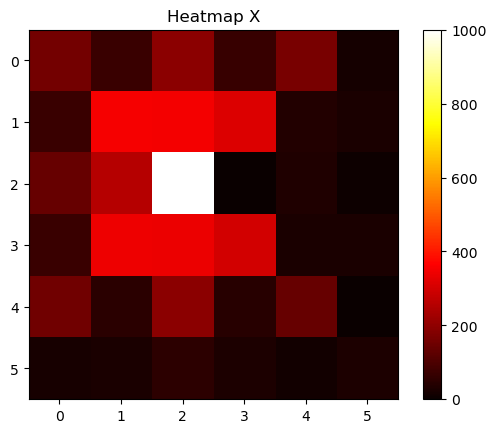

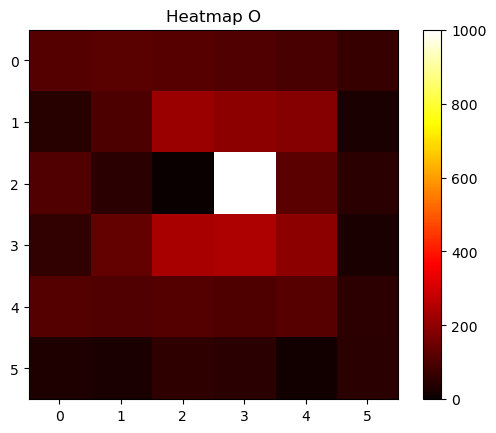

In [3]:
x = play_games_more_stats(1000, play_scoreV2_move, play_scoreV2_move, print_stats = True)

1000 gier ScoreV2 vs ScoreV2, widać ekstremalną zachowaczość. 


-----------

X wins: 69.00%
O wins: 31.00%
draws:  0.00%
Average moves played in game:  10.78
Average time of game:  432.68 ms
Average time of move:  40.137 ms


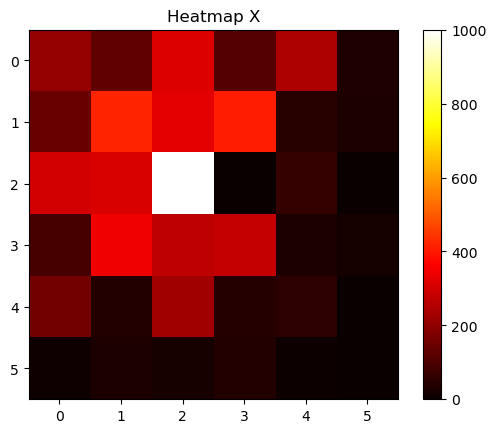

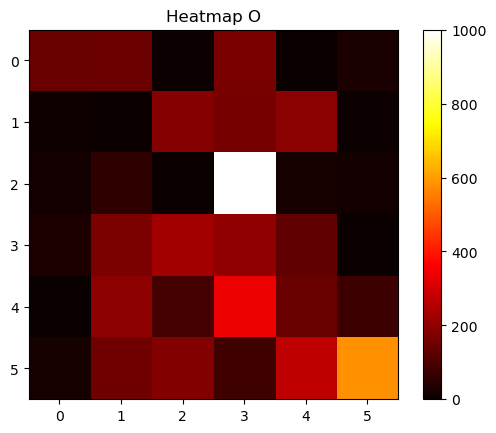

In [4]:
x = play_games_more_stats(1000, play_scoreV2_move, play_dcnn_move, print_stats = True)

1000 gier ScoreV2 vs DCNN (Deep Convolutional Neural Network). Widać że model poprawnie nauczył się stylu gry, i nawet jako gracz wykonujący 2 ruch wygrywa podobną ilość gier co w przykładzie powyżej. Niemniej wykonywanie ruchu w prawym dolnym rogu jest najprawdopodobniej reakcją na grę której sieć nie napotkała wcześniej, co oznacza że model słabo zgeneralizował grę. 



-----------

X wins: 0.00%
O wins: 100.00%
draws:  0.00%
Average moves played in game:  8.26
Average time of game:  7.88 ms
Average time of move:  0.954 ms


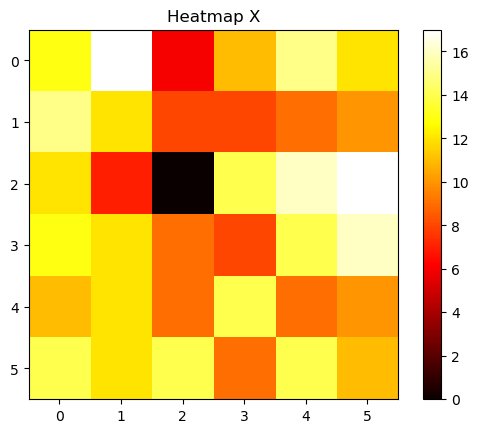

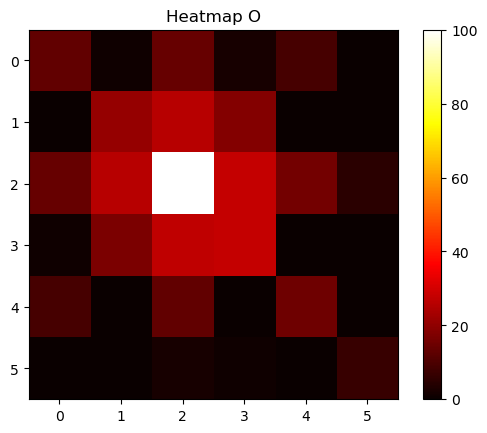

In [5]:
x = play_games_more_stats(100, play_random_move, play_scoreV2_move, print_stats = True)

Algorytm ScoreV2 nie ma najmniejszego problemu z pokonaniem gracza losowego.


-----------

X wins: 19.00%
O wins: 81.00%
draws:  0.00%
Average moves played in game:  16.35
Average time of game:  557.97 ms
Average time of move:  34.126 ms


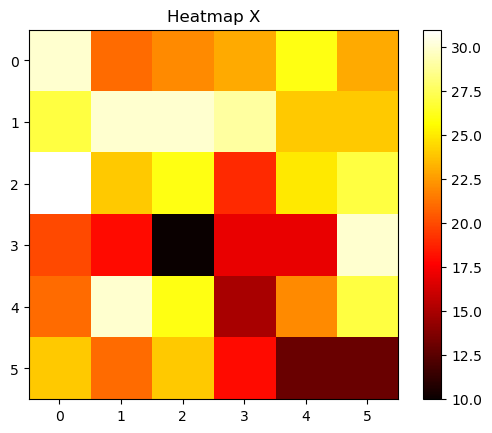

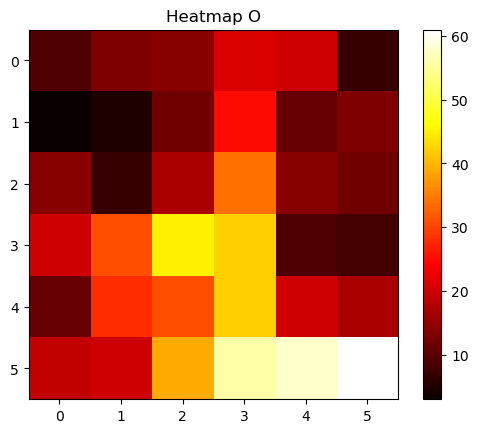

In [6]:
x = play_games_more_stats(100, play_random_move, play_dcnn_move, print_stats = True)

DCNN wygrywa z graczem losowym mizerne 80% gier, i to głownie dlatego że domyślna strategia 'nie wiem co robić stawiam O od końca planszy' jest stosunkowo skuteczna. Ponownie stwierdzamy, że model słabo zgeneralizował grę.

In [2]:
play_Alpha_Z_move = create_Alpha_Z_player(epoch = 3, print_summary = True)

Model: "resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 6, 2)]    0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 6, 6, 256)    4864        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 6, 6, 256)   1024        ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 6, 6, 256)    0           ['batch_normalization[0][0]'

C:\Users\sfelc\pyton_wszystko\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


                                                                                                  
 add_7 (Add)                    (None, 6, 6, 256)    0           ['batch_normalization_16[0][0]', 
                                                                  'activation_14[0][0]']          
                                                                                                  
 activation_16 (Activation)     (None, 6, 6, 256)    0           ['add_7[0][0]']                  
                                                                                                  
 conv2d_17 (Conv2D)             (None, 6, 6, 256)    590080      ['activation_16[0][0]']          
                                                                                                  
 batch_normalization_17 (BatchN  (None, 6, 6, 256)   1024        ['conv2d_17[0][0]']              
 ormalization)                                                                                    
          

To monstrum na górze to właśnie Alpha Zero. Uczylo się 3 dni, zrobiło się 5 epok. 

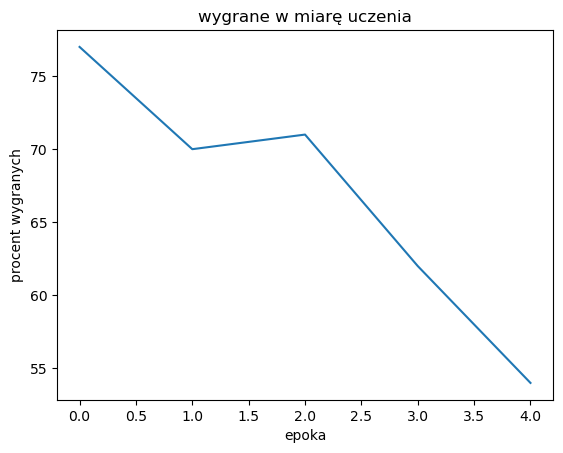

In [5]:
stata = np.zeros([5,6])
for i in range(5):
    stata[i,5] = i
    play_Alpha_Z_move = create_Alpha_Z_player(epoch = i)
    st = play_games_more_stats(100, play_Alpha_Z_move, play_random_move, print_stats = False)
    stata[i,0] = st[0] # wygrane X
    stata[i,1] = st[2] # remisy
    stata[i,2] = st[3] # ruchy na grę
    stata[i,3] = st[4] # czas na grę
    stata[i,4] = st[5] # czas na ruch

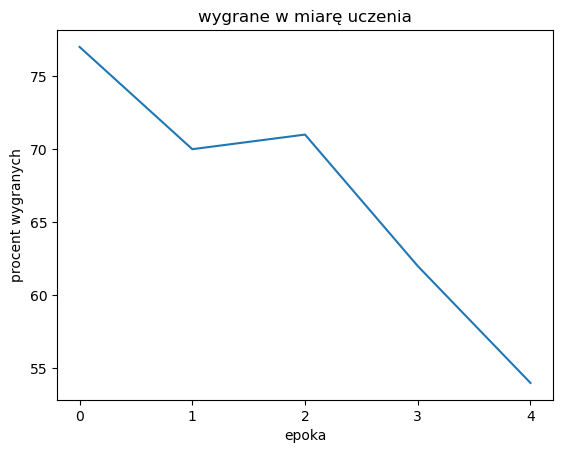

In [6]:
plt.plot(stata[:,5],stata[:,0])
plt.title('wygrane w miarę uczenia')
plt.xlabel('epoka')
plt.ylabel('procent wygranych')
plt.xticks([0,1,2,3,4])
plt.show()

Dosyć zaskakująco, kolejne epoki osiągają coraz gorsze wyniki. Nie mam pojącia dlaczego tak. Być może wczesne iteracje używają prostszej strategii, lub algorytm uczenia jest w jakiś sposób zepsuty. 

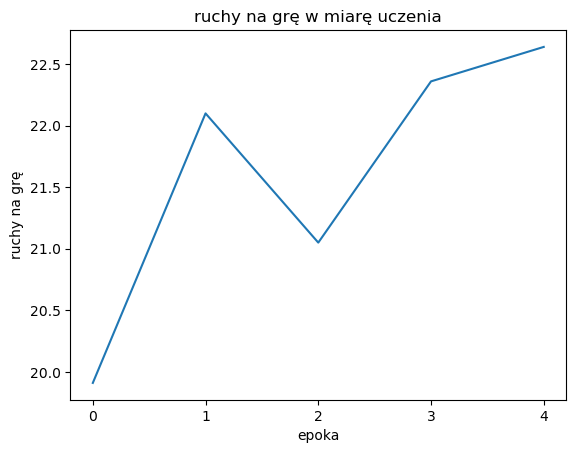

In [8]:
plt.plot(stata[:,5],stata[:,2])
plt.title('ruchy na grę w miarę uczenia')
plt.xlabel('epoka')
plt.ylabel('ruchy na grę')
plt.xticks([0,1,2,3,4])
plt.show()


-----------

X wins: 80.00%
O wins: 19.00%
draws:  1.00%
Average moves played in game:  20.92
Average time of game:  816.41 ms
Average time of move:  39.025 ms


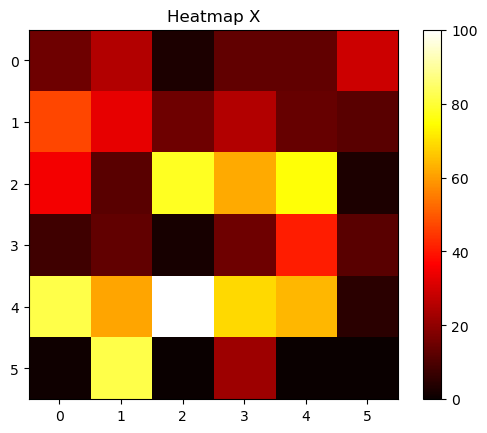

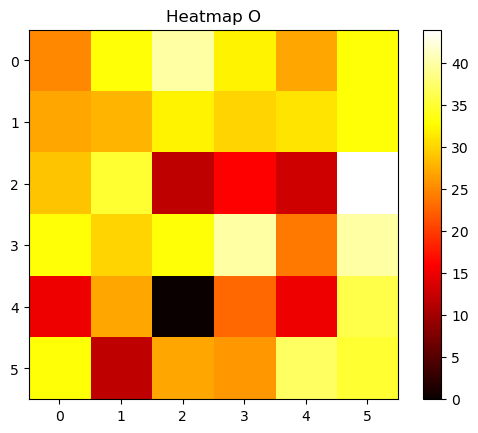

(80.0,
 19.0,
 1.0,
 20.92,
 816.4089202880859,
 39.025282996562424,
 array([ 15,  25,   3,  13,  13,  29,  47,  33,  15,  25,  14,  12,  35,
         12,  78,  62,  75,   3,   8,  13,   2,  15,  41,  12,  82,  61,
        100,  69,  64,   5,   1,  82,   0,  22,   0,   0]),
 array([25, 33, 40, 32, 27, 33, 27, 28, 32, 30, 31, 33, 29, 35, 12, 16, 13,
        44, 33, 30, 33, 40, 24, 40, 15, 27,  0, 23, 15, 36, 33, 12, 27, 26,
        37, 35]))

In [9]:
play_Alpha_Z_move = create_Alpha_Z_player(epoch = 0)
play_games_more_stats(100, play_Alpha_Z_move, play_random_move, print_stats = True)


-----------

X wins: 59.00%
O wins: 41.00%
draws:  0.00%
Average moves played in game:  22.91
Average time of game:  815.8 ms
Average time of move:  35.609 ms


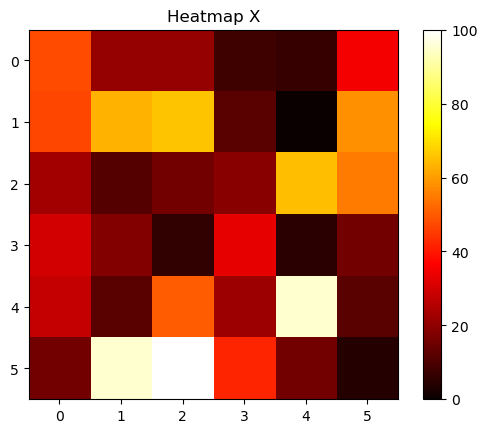

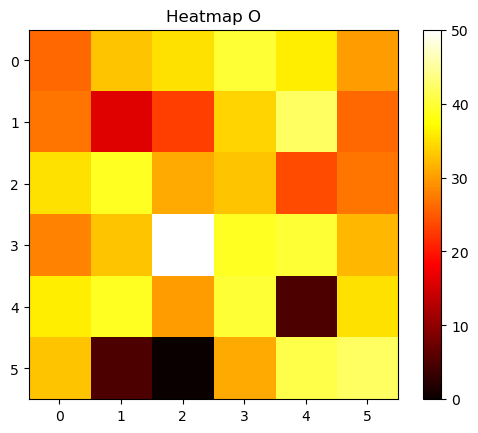

(59.0,
 41.0,
 0.0,
 22.91,
 815.7973718643188,
 35.60878969289912,
 array([ 48,  21,  21,   8,   7,  35,  47,  63,  66,  12,   0,  58,  23,
         11,  16,  19,  65,  55,  30,  18,   6,  33,   5,  16,  28,  12,
         50,  22,  95,  12,  16,  95, 100,  42,  16,   4]),
 array([26, 33, 35, 40, 36, 30, 27, 16, 23, 34, 42, 26, 35, 39, 31, 33, 24,
        27, 28, 33, 50, 39, 40, 32, 36, 39, 30, 40,  5, 35, 33,  5,  0, 31,
        41, 42]))

In [10]:
play_Alpha_Z_move = create_Alpha_Z_player(epoch = 4)
play_games_more_stats(100, play_Alpha_Z_move, play_random_move, print_stats = True)

## Wnioski 

Obydwa algorytmy spisały się średnio, choć do pewnego stopnia zgodnie z oczekiwaniami. Jeżeli chodzi o DCNN, żeby usprawnić jego działanie należałoby dostarczyć mu lepszy (niekoniecznie większy) zbiór treningowy, w którym znalazłoby się wiele różniących się od siebie gier granych przez dużo lepszych graczy (np. minmax z domieszką losowości). Należałoby też poeksperymentować z rozmiarem i architekturą sieci.

W wypadku Alpha Zero, zdecydowanie brakowało zasobów obliczeniowych żeby osiągnąć zadowalające efekty. Co do niespodziewanego spadku wygrywalności dla kolejnych epok, może być to spowodowane róznymi czynnikami, nawet być statystyczną anomalią (to że praktycznie przypadkowe wagi w sieci produkują różne strategie). Możliwe jest również że algorytm uczenia posiada jakieś błędy, ale ciężko jest to stwierdzić. 

Jeżeli miałbym spróbować jeszcze raz rozwiązać ten problem, myślę że dobrym rozwiązaniem byłoby napisanie od zera algorytmu uczenia poprzez grę z samym sobą i puszczenie tam sieci już wstępnie wytrenowanej na grach silnych graczy. Dobrym pomysłem byłoby również rozbudowanie funkcji wybierającej ruchy, np. zamiast brać czystą predykcję sieci, połączyć to z innymi algorytmami nie opartymi na uczeniu maszynowym, oraz wprowadzić element losowy. Można wspomnieć że np. w szachach Alpha Zero już od dawna nie jest najsilniejszym silnikiem, a tytuł ten powrócił do norweskiego Stockfish'a który wciąż głównie jest oparty na (mocno dostosowanym i zoptymalizowanym) minmaxie, z siecią neuronową jako pewnym dodatkowym wspomagaczem. 

